### Final Deliverable

1.  **Contributor**

    Xinran Liang

2. **Libraries that are utilized thus need to be installed**

   folium, pandas, matplotlib, numpy, datetime, scipy 

3. **Things**

  1) In this project, I'm using an extra python script file, two_computations.py, which contains definitions of two functions. I'll 'import' this py file at the beginning of this project. 

  2) I had 4 datasets gained by scrapers/crawlers, and an extra dataset, a geojson file, which records geo-spatial data of all counties in California. I downloaded this dataset from GitHub at https://github.com/codeforamerica/click_that_hood.git      Contributor: mwichary. 
  
  3) Data crawled from API and web pages updates every day. In order to realize visualization and analysis in this final deliverable, I chose datasets collected on Dec 7 2020 around 1:40 pm as the final version.  

4. **What are things set out to study?**

   I'd like to investigate 1. the geographical distribution of the fast food popularity in California. For the county 
   where fast food is most popular (or in other words, the county where fast-food restaurants gain the most popularity values), I 
   want to know 2. **how** the fast-food heat changed after the outbreak of Covid-19 pandemic and 3. **whether** the fast-
   food popularity is correlated to Covid-19 spreading. Thus, this project can be roughly divided into two parts for answering 3 questions. 
   
   In part 1, I present the **fast-food popularity distribution** over a California map and get the name of 
   county with the most popularity value. This part means to set up a background and get ready for the  rest of 
   exploration. 
   
   In part 2, because I use 'popularity value', which is calculated from Yelp users' reviews and rating, to represent 
   changes of fast-food heat, I want to make sure that this value trully has some **power of representing**. Thus, at beginning of this part, I utilize 
   count of LA Dailys News' posts, which are relevant to fast food, to prove the synchronicity between social attention on fast food and the fast-food popularity value. 
   (Turns out News data shows a similar trajectory of development, which reinforce the representing power of 
   popularity values)
   
   After this, I show **the correlations between popularity values and Covid-19 cases'/deaths' increase** with some statistical study.   
   

5. **What are things discovered or concluded?**
   
   In the part 1, I discovered how popular is fast food in each county of California. 
   
   In the part 2, I  proved that the "fast-food popularity value" has some power of presenting. Then I calculated a group of r squared and Pearson r from fast-food popularity value and Covid-19 records to see the correlational relationships between fast-food heat and Covid-19 spreading. 
   
   The results: all r squared values are close to 0, and for Pearson method, p-values are too high but r values are too low. 
   
   As a result, I concluded that fast-food popularity has no correlation with Covid-19 
   cases' increase or with Covid-19 deaths' increase, vice versa. 
   
   

6. **Skills wanted**

    I wish that I know how to create many types of statistical model over each dataset. Then, I may be able to predict    
    missing data or better fit the trends of the popularity. 
    
    Plus, skills of doing pattern detection and comparison from two trends are also the thing I wish to have. With those skills, I'll be able to describe the sililarity among trends with numerical metrics. 

7. **Longer plan for the project**

    I want to do more researches about this topic: relationship between the pandemic and fast food popularity. I think that I could explore more latent variables, such as local temperature, local taste of food in general, etc. into the statistical model. Then, I'll see whether some interactive effects exist in the correlational relationship. A concrete plan may include getting temperature records (data collection), designing/conducting user studies (data collection 2), processing data, doing more advanced analysis, and getting a conclusion.  

In [1]:
# need to install folium if didn't do so before 
#!pip install folium 

%matplotlib inline
import folium
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import scipy.stats as stats
import datetime 
from src import two_computations as compute

In [2]:
# import datasets 
cali_overall_fastfood = pd.read_csv('./data/Cali_fastfood_popularity.csv')
popularity_with_time = pd.read_csv('./data/recent_fast_food_reviews.csv',index_col=0)
news = pd.read_csv('./data/News_info.csv',index_col=0)
covid_19_records = pd.read_csv('./data/Covid_19_records.csv',index_col=0)

Firstly, let's take a look how fast-food popularity is geographicically distributed in California's counties. This is the data set that we'll use: 

In [3]:
# this is the data set from source 1
cali_overall_fastfood.head()

,county,business_id,business_name,review_count,rating,transaction_forms,url,state,popularity
0,Alameda County,MTsj7IyTVS9DwiMK9rEJbw,In-N-Out Burger,228,4.0,delivery,https://www.yelp.com/biz/in-n-out-burger-liver...,CA,3.849195
1,Alameda County,_qTHudK_cZXMSX9lCRvBgQ,Chick-fil-A,388,3.5,NaN,https://www.yelp.com/biz/chick-fil-a-pleasanto...,CA,3.816560
2,Alameda County,TQrPPNiBTDVYG6Eg1d0hCw,Jollibee,80,2.5,NaN,https://www.yelp.com/biz/jollibee-hayward?adju...,CA,3.821474
3,Alameda County,KtUWpP6qUncBcDxlHJntXw,Jollibee,717,2.5,delivery,https://www.yelp.com/biz/jollibee-union-city?a...,CA,3.656127
4,Alameda County,gzwD--_8Ho5rOSGLy45cXQ,Shake Shack,1048,3.0,delivery,https://www.yelp.com/biz/shake-shack-palo-alto...,CA,3.671544


This data set provides information about which county do businesses locate in and their popularity values. Based on it, I'll form a new dataframe showing county name and total popularity values of the county. 

In [4]:
# first, reformat couties' names similar to geo-spacial data  
new_counties = []
for county in cali_overall_fastfood['county'].to_list():
    new_counties.append(' '.join(county.split()[:-1]))
# extract popularity values out
popularity = cali_overall_fastfood['popularity'].to_list()
# get a new dataframe showing county name and popularity 
county_popularity = pd.DataFrame.from_records({'County':new_counties,'popularity':popularity})
total_popularity_df = county_popularity.groupby('County').sum()
# name the column after aggregation correctly
total_popularity_df.rename(columns={'popularity':'Total_popularity'},inplace=True)
total_popularity_df.reset_index(inplace=True)

In [5]:
# this new dataframe looks like:
total_popularity_df.head()

,County,Total_popularity
0,Alameda,76.403730
1,Alpine,57.738825
2,Amador,76.800688
3,Butte,76.789791
4,Calaveras,76.799387


Next, I'll draw a choropleth map to show counties' degree of fast-food popularity. To make the map more interpretable, I will replace outliers, that are too small, as a same lowest number, 75.

In [6]:
# get a list of popularity values which are less than 75
less_than_75 = total_popularity_df.loc[total_popularity_df.Total_popularity < 75]['Total_popularity'].to_list()
total_popularity_df.replace(less_than_75,75,inplace=True)

In [7]:
# the adjusted dataframe looks like:
total_popularity_df.head()

,County,Total_popularity
0,Alameda,76.403730
1,Alpine,75.000000
2,Amador,76.800688
3,Butte,76.789791
4,Calaveras,76.799387


In [8]:
# import the geo-spatial data for drawing the map. 
# Source: https://github.com/codeforamerica/click_that_hood.git  contributor: mwichary 
cali_geo = './data/extra_data_california_counties.geojson'
# location representing California: 32.00 N, -119.42 W
Cali_map = folium.Map(location=[32.00, -119.42], zoom_start=5)
folium.Choropleth(
    geo_data=cali_geo,
    name='Overall Popularity of Fast Food in California',
    data=total_popularity_df,
    columns=['County', 'Total_popularity'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=0.7,
    legend_name='fast-food popularity in California'
).add_to(Cali_map)
folium.LayerControl().add_to(Cali_map)

In the following map, county's color goes red when the popularity is higher, otherwise be more yellow (as the legend shows).

Users can click on +/- at left-up corner to zoom in or out the map. 

In [9]:
# this is the Choropleth map 
Cali_map

As it shows, Lake county, Napa county, and Riverside county are places where many people may like fast food. 

This is a computation to see which county has the most popularity value:

In [9]:
# details of the computation can be seen in ./src/two_computations.py 
county_max_fastfood_popu = compute.county_with_most_popularity(total_popularity_df)
print(f'The county with the most fast-food popularity value is: {county_max_fastfood_popu}.')

The county with the most fast-food popularity value is: Riverside.


In the next step, I'll show how fast-food attention changes in this county after Covid-19's spreading. 

The following datasets will be utilized: 

In [10]:
# the processed data set 2:
popularity_with_time.head()

,times,total_rating,average_rating,popularity
review_date,,,,
2020-03-18,1,5,5.000000,4.266366
2020-03-19,1,5,5.000000,4.266366
2020-03-20,1,1,1.000000,3.599699
2020-03-21,3,13,4.333333,4.226486
2020-03-23,2,3,1.500000,3.246426


In [11]:
# and data set 3 (dates not in order)
news.head()

,number_of_fast_food_related_news
date,
2020-03-20,3
2020-04-08,2
2020-06-02,1
2020-08-25,1
2020-10-16,2


These datasets show how much popularity value do local fast-food businesses gain, and how many are news about fast food posted on each date respectively. 

By combining and visualizing these variables, we'll quickly check wether they share a similar pattern of development, and tell whether the "popularity values" have trustful power of representing real fast-food trend. 

Here, we firstly join relevant attributes together as a new dataframe, and present the visualization with it:

In [12]:
# joins data of two variables
popu = pd.DataFrame({'popularity':popularity_with_time['popularity']})
popu_news = popu.join(news, how='outer')
# to investigate data points that show up in same period 
dates1 = popularity_with_time.index.values
dates2 = news.index.values
# get the list of dates; details of the computation can be seen in ./src/two_computations.py
dates = compute.get_time_period(dates1,dates2)
# filter this popu_news data set
popu_news = popu_news[popu_news.index.isin(dates)]
# fill missing popularity data by the previous value
popu_news['popularity'].fillna(method='ffill',inplace=True)

In [13]:
# this is the result data set for drawing plots:
popu_news.head()

,popularity,number_of_fast_food_related_news
2020-03-18,4.266366,2.0
2020-03-19,4.266366,2.0
2020-03-20,3.599699,3.0
2020-03-21,4.226486,1.0
2020-03-23,3.246426,1.0


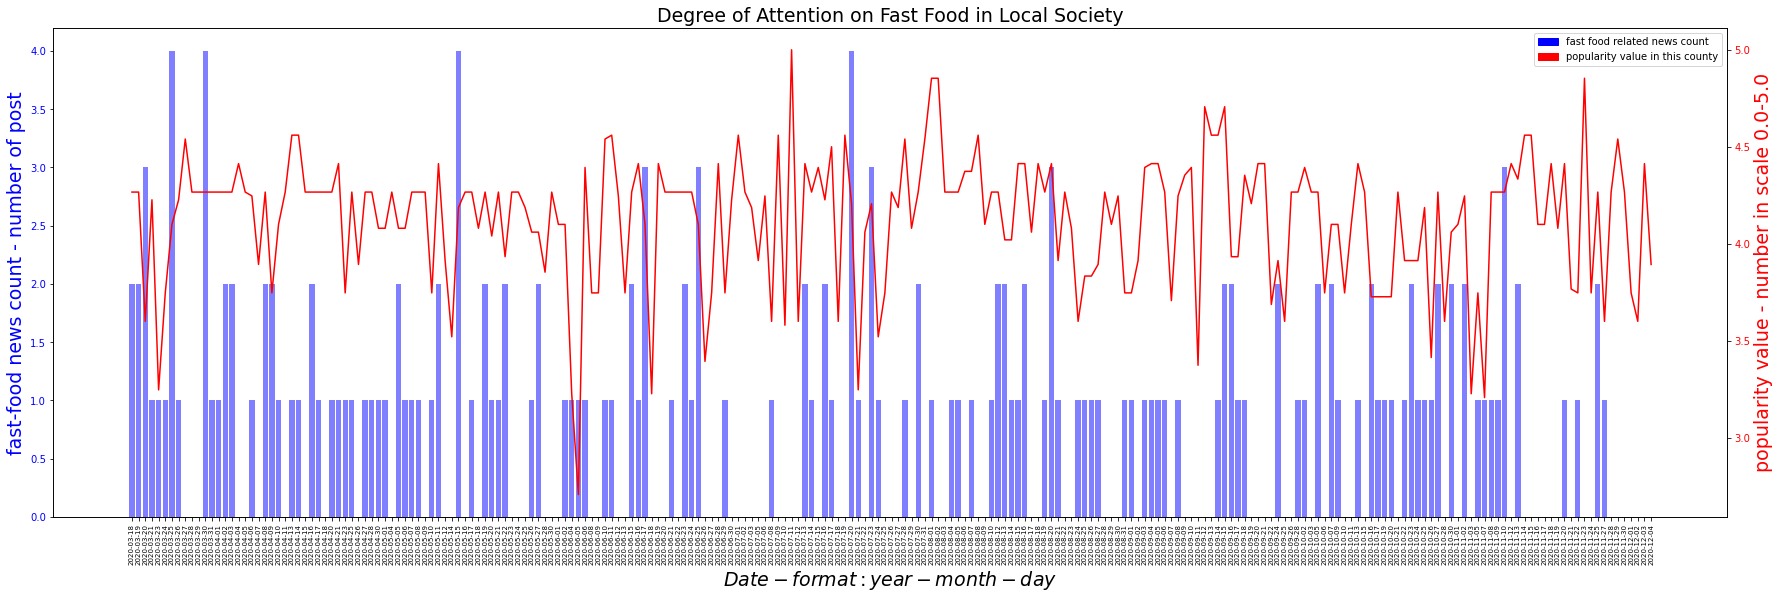

In [15]:
# visualize data of two variables in the same plot
x = popu_news.index.values
y1 = popu_news.popularity
y2 = popu_news.number_of_fast_food_related_news
# set the figure's size
fig, ax1 = plt.subplots(figsize=(30, 9))
# create a bar graph with the data of news count
ax1.bar(x, y2, alpha=0.5, color='blue')
# create x label
ax1.set_xlabel('$Date - format: year-month-day$', size=19)
# adjust dates shown in x-ticks to make reading easier
ax1.set_xticklabels(x, fontsize= 7,rotation= 'vertical')
# create fast-food news count label at left 
ax1.set_ylabel('fast-food news count - number of post', color='blue', size=19)
[tl.set_color('blue') for tl in ax1.get_yticklabels()]
# create a line graph with the data of popularity value in the same plot
ax2 = ax1.twinx()
ax2.plot(x, y1, color='red')
# create popularity value label at right 
ax2.set_ylabel('popularity value - number in scale 0.0-5.0', color='red', size=19)
[tl.set_color('red') for tl in ax2.get_yticklabels()]
# add legends
blue = mpatches.Patch(color='blue', label='fast food related news count')
red = mpatches.Patch(color='red', label='popularity value in this county')
plt.legend(handles=[blue,red])
# add plot's title
plt.title('Degree of Attention on Fast Food in Local Society', size=19)

# draw the plot
plt.show()

By observation, it's somewhat significant that ups and downs of News' count happened with ups and downs of popularity value. Although the amplitudes of fluctuation over these two variables are different, they still show a similarity of patterns.  

Thus, I suppose changes of fast-food popularity values well represent the fluctuation of real fast-food popularity in the local society.  

Then, let's focus on the fluctuation itself: 

From the plot, we hardly observe a continuous increase or decrease on popularity during these months. In fact, the value experienced several climbs and dips. The differences of values were more obvious during the middle period and at the end (current days), and there was a very big decrease happened in May. 

Then, I started to think "Why did the fast-food popularity develop in this way? What kind of element may it relate to?" To explore them, I decided to look into the correlation between fast-food popularity and Covid-19 spreading, which should be the most noticed topic in 2020. 

Here, we'll use the fourth dataset:

In [16]:
# this is an example of data set 4:
covid_19_records.head()

,county,date,new_cases,new_deaths
0,Santa Clara,2020-03-18,151,6
1,Santa Clara,2020-03-19,32,2
2,Santa Clara,2020-03-20,63,0
3,Santa Clara,2020-03-21,23,2
4,Santa Clara,2020-03-22,15,3


I'll only use the records of the county with max popularity value:

In [17]:
# this data set records Covid-19 daily cases and deaths in the aim county
county_covid_19_records = covid_19_records.loc[covid_19_records.county == county_max_fastfood_popu.rstrip(' County')] 
county_covid_19_records.set_index('date',inplace=True)
county_covid_19_records.head()

,county,new_cases,new_deaths
date,,,
2020-03-18,Riverside,11,2
2020-03-19,Riverside,3,1
2020-03-20,Riverside,5,0
2020-03-21,Riverside,1,0
2020-03-22,Riverside,6,2


Combing this data with dataset 2, I'll investigate the correlational relationship between changes of fast-food popularity and Covid-19 spreading.

In [18]:
# get this county's Covid_19 cases records
county_cases = county_covid_19_records['new_cases']
# get this county's Covid_19 deaths records
county_deaths = county_covid_19_records['new_deaths']
# get popularity information
county_fastfood = popularity_with_time['popularity']

In [19]:
# the popularity-cases dataframe
popu_cases_df = pd.DataFrame({'new_covid19_cases': county_cases,'popularity': county_fastfood})
# concentrate on dates where popularity values exist
popu_cases_df.dropna(inplace=True)
popu_cases_df.head()

,new_covid19_cases,popularity
2020-03-18,11,4.266366
2020-03-19,3,4.266366
2020-03-20,5,3.599699
2020-03-21,1,4.226486
2020-03-23,13,3.246426


In [20]:
# the popularity-deaths dataframe
popu_deaths_df = pd.DataFrame({'new_covid19_deaths': county_deaths,'popularity': county_fastfood})
# concentrate on data overlapping at same dates
popu_deaths_df.dropna(inplace=True)
# example:
popu_deaths_df.head()

,new_covid19_deaths,popularity
2020-03-18,2,4.266366
2020-03-19,1,4.266366
2020-03-20,0,3.599699
2020-03-21,0,4.226486
2020-03-23,0,3.246426


Let's first investigate the correlation between fast-food popularity and Covid-19 cases' increase in this county.

I'll use two methods to explore the correlation, by modeling polynomials with degree 1, 2, 3 and calculating the Pearson correlation: 

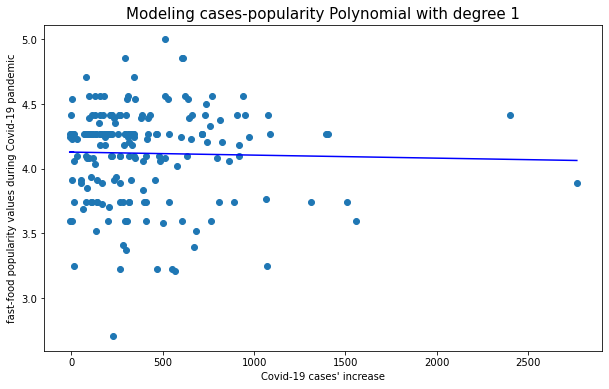

R squared for polynomial with degree 1 is 0.0006415921452709135.


In [21]:
# Polynomial method:

# draw the scatter plot between popularity value and cases' increase 
plt.figure(figsize = (10,6)) 
y = popu_cases_df.popularity
x = popu_cases_df.new_covid19_cases

# under the model with degree = 1:
parameter = np.polyfit(x, y, 1)
# p := the polynomial formulating these two variables
p = np.poly1d(parameter)
# draw the plot
plt.scatter(x, y)
plt.plot(x, p(x), color='blue')
plt.ylabel('fast-food popularity values during Covid-19 pandemic')
plt.xlabel("Covid-19 cases' increase")
plt.title('Modeling cases-popularity Polynomial with degree 1', size=15)
plt.show()

# let's see the correlation coefficient: R^2 when degree = 1
print(f'R squared for polynomial with degree 1 is {np.corrcoef(y, p(x))[0,1]**2}.')

With degree = 1, we see a slightly negative relationship between cases' number and popularity value, but R squared is too low, so there seems no correlation between the two variables in this case. 

Next les't check degree = 2:


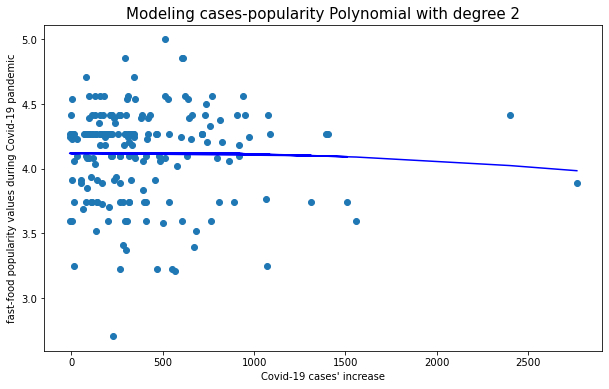

R squared for polynomial with degree 2 is 0.001260756319025106.


In [22]:
# draw the scatter plot between popularity value and cases' increase 
plt.figure(figsize = (10,6)) 
y = popu_cases_df.popularity
x = popu_cases_df.new_covid19_cases

# under the model with degree = 2:
parameter = np.polyfit(x, y, 2)
# p := the polynomial formulating these two variables
p = np.poly1d(parameter)
# draw the plot
plt.scatter(x, y)
plt.plot(x, p(x), color='blue')
plt.ylabel('fast-food popularity values during Covid-19 pandemic')
plt.xlabel("Covid-19 cases' increase")
plt.title('Modeling cases-popularity Polynomial with degree 2', size=15)
plt.show()

# let's see the correlation coefficient: R^2 when degree = 2
print(f'R squared for polynomial with degree 2 is {np.corrcoef(y, p(x))[0,1]**2}.')

Similarly, R squared value is too small to have a significant correlation.

Let's check degree = 3:

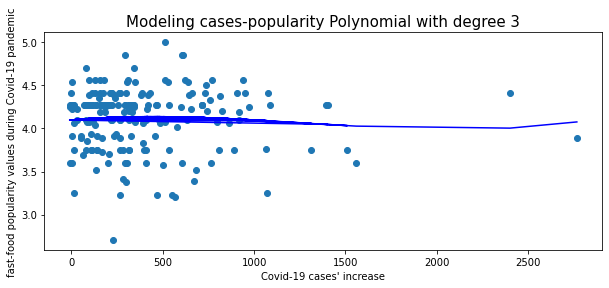

R squared for polynomial with degree 3 is 0.003080648358466928.


In [23]:
# draw the scatter plot between popularity value and cases' increase 
plt.figure(figsize = (10,4)) 
y = popu_cases_df.popularity
x = popu_cases_df.new_covid19_cases

# under the model with degree = 3:
parameter = np.polyfit(x, y, 3)
# p := the polynomial formulating these two variables
p = np.poly1d(parameter)
# draw the plot
plt.scatter(x, y)
plt.plot(x, p(x), color='blue')
plt.ylabel('fast-food popularity values during Covid-19 pandemic')
plt.xlabel("Covid-19 cases' increase")
plt.title('Modeling cases-popularity Polynomial with degree 3', size=15)
plt.show()

# let's see the correlation coefficient: R^2 when degree = 3
print(f'R squared for polynomial with degree 3 is {np.corrcoef(y, p(x))[0,1]**2}.')

R sqaured is too low, so there's no correlation between these two variables when degree = 3.

Let's check Pearson correlation between these variables:

In [24]:
# Pearson correlation

popu_cases_pearson_r = popu_cases_df.corr().iloc[0,1]
print(f"Pearson r of Fast-food popularity and cases' increases is {popu_cases_pearson_r}.")
r, p = stats.pearsonr(popu_cases_df['new_covid19_cases'], popu_cases_df['popularity'])
print(f"Scipy computed: Pearson r as {r}, p-value as {p}.")


Pearson r of Fast-food popularity and cases' increases is -0.025329669268884258.
Scipy computed: Pearson r as -0.025329669268884247, p-value as 0.7259051464170809.


[Text(0.5, 1.0, 'Fast-food Popularity in the County and Covid-19 cases updates, Pearson r = -0.03')]

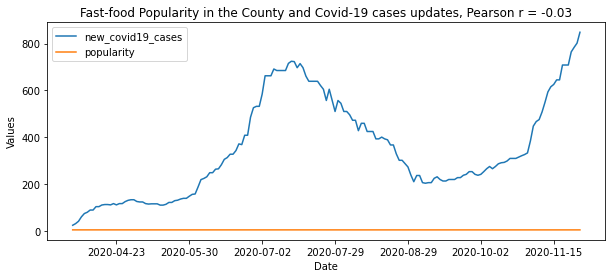

In [25]:
# Compute the rolling window synchrony
f,ax=plt.subplots(figsize=(10,4))
popu_cases_df.rolling(window=20 ,center=True).median().plot(ax=ax)
ax.set(xlabel='Date', ylabel='Values')
ax.set(title=f"Fast-food Popularity in the County and Covid-19 cases updates, Pearson r = {np.round(popu_cases_pearson_r,2)}")

By this method, p-value is very high, >0.7, so actually r value doesn't mean much in this case. If we consider about r, this Pearson r is very close to 0, which means that there's no correlation between popularity and Covid-19 cases' number. 

By utilizing same methods, I'll explore the correlational relationship between number of deaths and fast-food popularity value. 

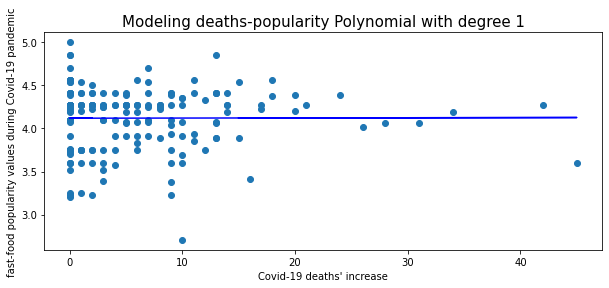

R squared for polynomial with degree 1 is 1.372888417738246e-05.


In [26]:
# Polynomial method:

# draw the scatter plot between popularity value and deaths' increase 
plt.figure(figsize = (10,4)) 
y = popu_deaths_df.popularity
x = popu_deaths_df.new_covid19_deaths

# under the model with degree = 1:
parameter = np.polyfit(x, y, 1)
# p := the polynomial formulating these two variables
p = np.poly1d(parameter)
# draw the plot
plt.scatter(x, y)
plt.plot(x, p(x), color='blue')
plt.ylabel('fast-food popularity values during Covid-19 pandemic')
plt.xlabel("Covid-19 deaths' increase")
plt.title('Modeling deaths-popularity Polynomial with degree 1', size=15)
plt.show()

# let's see the correlation coefficient: R^2 when degree = 1
print(f'R squared for polynomial with degree 1 is {np.corrcoef(y, p(x))[0,1]**2}.')

We see a very flat regression line from the plot. 

Because R squared value is too small (< 10%), there's no correlation between two variables (with degree 1). 

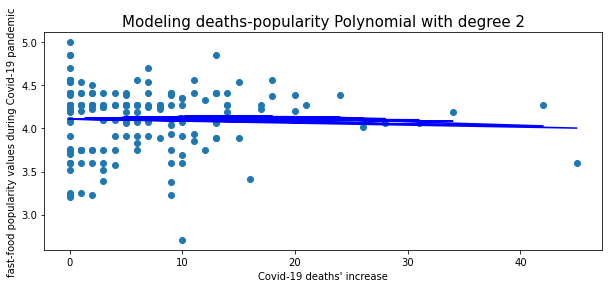

R squared for polynomial with degree 2 is 0.002107320520758447.


In [27]:
# Polynomial method:

# draw the scatter plot between popularity value and deaths' increase 
plt.figure(figsize = (10,4)) 
y = popu_deaths_df.popularity
x = popu_deaths_df.new_covid19_deaths

# under the model with degree = 2:
parameter = np.polyfit(x, y, 2)
# p := the polynomial formulating these two variables
p = np.poly1d(parameter)
# draw the plot
plt.scatter(x, y)
plt.plot(x, p(x), color='blue')
plt.ylabel('fast-food popularity values during Covid-19 pandemic')
plt.xlabel("Covid-19 deaths' increase")
plt.title('Modeling deaths-popularity Polynomial with degree 2', size=15)
plt.show()

# let's see the correlation coefficient: R^2 when degree = 2
print(f'R squared for polynomial with degree 2 is {np.corrcoef(y, p(x))[0,1]**2}.')

R squared is very low, so there's no correlation between variables (with degree 2).

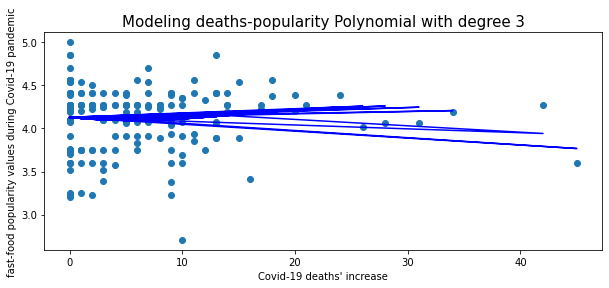

R squared for polynomial with degree 3 is 0.013642923523787017.


In [28]:
# Polynomial method:

# draw the scatter plot between popularity value and deaths' increase 
plt.figure(figsize = (10,4)) 
y = popu_deaths_df.popularity
x = popu_deaths_df.new_covid19_deaths

# under the model with degree = 3:
parameter = np.polyfit(x, y, 3)
# p := the polynomial formulating these two variables
p = np.poly1d(parameter)
# draw the plot
plt.scatter(x, y)
plt.plot(x, p(x), color='blue')
plt.ylabel('fast-food popularity values during Covid-19 pandemic')
plt.xlabel("Covid-19 deaths' increase")
plt.title('Modeling deaths-popularity Polynomial with degree 3', size=15)
plt.show()

# let's see the correlation coefficient: R^2 when degree = 3
print(f'R squared for polynomial with degree 3 is {np.corrcoef(y, p(x))[0,1]**2}.')

The R squared with degree 3 is a little higher than under degress 1, 2. However, the value is still too far from 1, so we may think this situation as no correlation. 

At last, let's check the Pearson r for these variables:

In [29]:
# Pearson correlation

popu_deaths_pearson_r = popu_deaths_df.corr().iloc[0,1]
print(f"Pearson r of Fast-food popularity and deaths' increases is {popu_deaths_pearson_r}.")
r, p = stats.pearsonr(popu_deaths_df['new_covid19_deaths'], popu_deaths_df['popularity'])
print(f"Scipy computed: Pearson r as {r}, p-value as {p}.")

Pearson r of Fast-food popularity and deaths' increases is 0.003705250892637807.
Scipy computed: Pearson r as 0.0037052508926377972, p-value as 0.9591065233387064.


[Text(0.5, 1.0, 'Fast-food Popularity in the County and Covid-19 deaths updates, Pearson r = 0.0')]

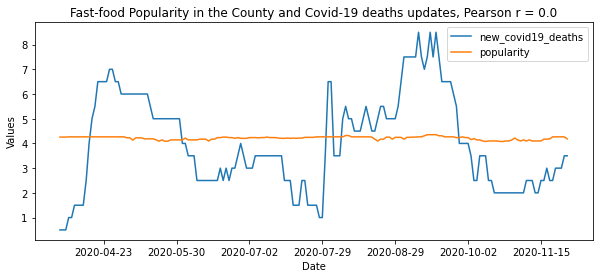

In [30]:
# Compute the rolling window synchrony
f,ax=plt.subplots(figsize=(10,4))
popu_deaths_df.rolling(window=20 ,center=True).median().plot(ax=ax)
ax.set(xlabel='Date', ylabel='Values')
ax.set(title=f"Fast-food Popularity in the County and Covid-19 deaths updates, Pearson r = {np.round(popu_deaths_pearson_r,2)}")

p-value is also very high, so the Pearson r doesn't mean much here. As for Pearson r itself, this time r is approximately equal to 0. This means that there's no correlation between fast-food popularity value and Covid-19 deaths number. 

After a series of exploration, I can conclude that there's no significant correlation between fast-food popularity and Covid-19 spreading. 


**Final Conclusion**

This result is slightly different from my expectation. I used to think that after working rythum is broken by Covid-19, less people would choose fast food, so fast food might encounter a decreasing trend, and this trend might be negatively correlated with Covid-19 boom. (in other words, more Covid-19 cases/deaths, less fast-food popularity.) 

However, data from Yelp.com and local media shows a highly fluctuating development for fast-food popularity, and the correlational metrics are all too weak to support such a relationship. These results together reject my former thoughts. 

As for the first part, the geo-distribution map is similar to my expectation. I utilized several groups of datasets collected on different dates to draw that map. Places shown in red are concentrated in counties which are very populated or famous for tourism/fast food itself. (e.g. LA county showed up many times, Riverside county, Napa county...) 

At last, it's true that this project reflects some obvious features, but some relationships between variables keep ambiguous. Based on the accuracy of analysis that I could reach, I can't guarantee that all conclusions are 100% reliable. For example, I can't deny the possibility that there exist some non-linear correlations between fast-food popularity and Covid-19 spreading or a linear one hidden by too many confounds. Therefore, this deliverable actually shows my motives and some basic investigation. I believe in the future, I can go deeper on these topics with more advanced tools and methods.  
